In [1]:
# Import Packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
#pd.set_option('display.expand_frame_repr', False)
#pd.set_option('max_colwidth', -1)

In [2]:
output_path = 'output/models/'

import os
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [3]:
# Import prospective dataset
df= pd.read_excel('H:/RediMinds/DRMahen/Preethi PN_Data validation_2014-2018.xlsx', sheet_name='PN_Data validation_2014-2018')

In [4]:
df.head()

,PATIENTNUMBER,PROCNAME,CENTERCODE,SURGEONCODE,RECPROGRESS,CREATEDDATE,GENDER,DATEOFBIRTH,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,ECOG,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,SYMPTOMS,SOLITARYKIDNEY,TYPEOFSOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,PREOPMULTIFOCALITY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,UCSINVASION,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,CM,R.E.N.A.L.NEPHROSCORE,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,EXOPHYTICENDOPHYTICPROPERTIES,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,TumorConsistencyonImaging,BosniakClassification,DATEOFSURGERY,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,ImagingFeaturesofotherexcisedtumor,Consistencyoftheotherexcisedtumors,ACCESS,DAVINCIMODEL,ROBOTICSARMS,ASSISTENTTROCARS,DUALCONSOLE,PRIMARYSURGEON,OPERATIVETIMEmin,ISCHEMIA,CLAMPARTERY,SELECTIVEARTERIALCLAMPING,CLAMPVEIN,EARLYUNCLAMPING,FLUORESCENCE,INNERRENORRHAPHY,OUTERRENORRHAPHY,ISCHEMIATIMEmin,UCSREPAIR,HAEMOSTATICAGENTS,HAEMOSTATICDetails,LYMPHNODEDISSECTIONLND,BLOODLOSSml,INTRAOPTRANSUFUSION,SURGICALCONSIDERATIONS,INTRAOPCOMPLICATION,INTRAOPCOMPLICATIONS,NeedtoConverttoRadicalNephrectomy,TREATMENTOFCOMPLICATION,POSTOPCOMPLICATION,SURGICALCOMPLICATIONS,NONSURGICALCOMPLICATIONS,POSTOPTREATMENTOFCOMPLICATION,CLAVIENGRADE,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,MULITIFOCALITY,PATHOLOGY,HYSTOTYPEMALIGNANAT,HYSTOTYPEMALIGNANATYES,HYSTOTYPEBENIGN,HYSTOTYPEBENIGNYES,FUHRMANGRADING,SARCOMATOIDDIFF,SARCOMATOIDDIFF_A,NECROSIS,MICROVENOUSINVASION,UCSINVASION_A,PERIRENALFATINVASION,HilarFatInvasion,SINUSFATINVASION,MICSCORE,ADRENALINVASION,GEROTAINVASION,RenalVeinInvasion,VENOUSTHROMBUS,SURGICALMARGIN,UNIFOCALMULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITEOFPOSITIVENODE,TREATMENTPSM,PT,PN,OTHERTUMORS,DATEOFRECURRENCE,LASTFOLLOWUPDURATION,TIMETORECURRENCE,LASTFOLLOWUPSTATUS,LASTFOLLOWUPRECURRENCE,LASTTREATMENTOFRECURRENCE,TYPEOFCOMPLICATIONSs,SELECTEDSURGICALCOMPLICATIONSs,SELECTEDNONSURGICALCOMPLICATIONSs,TREATMENTOFCOMPLICATIONSs,RECURRENCEs,FOLLOWUPDATEs,STATUSs,TREATMENTs,CREATININEs,EGFRs,SRFs,ERPFs,Year
0,10PAT000065,Partial Nephrectomy,U5WT3NOY,QIG8PUOL,Pathology completed,2018-11-18 13:00:00.0,Male,1964.0,54.0,Married,White/Caucasian,Not Provided,NaN,NaN,NaN,NaN,"Fully active, able to carry on all pre-disease...",0.0,2.0,Absent,No,NaN,No,Left,Left,No,NaN,Lower Pol,15.4,48.0,6300.0,8.10,NaN,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-21 00:00:00.0,Category 2,Relative,No,1.0,NaN,NaN,Transperitoneal,Xi,4-arms,Only 12 mm,No,Staff,02:30,Warm,Bulldog,No,No,No,Used,Yes,Yes,31.0,Performed,Yes,Surgiflo,Not Performed,50.0,No,NaN,No,NaN,No,NaN,Complications,NaN,"321,323","IV antibiotics, discharged with oral antibiotics",Grade 2: Complications needing only use of int...,13.699999999999999,45,1.14,63,12900,999,999,999,999,NaN,13,35,"0,9",61,4300,5.0,8.0,NaN,NaN,Absent,Benign,No,NaN,Yes,Angiomyolipoma,NaN,Absent,NaN,Absent,Absent,Absent,Absent,Absent,Absent,0.0,Absent,Absent,Absent,Absent,Negative,NaN,NaN,NaN,NaN,Wait and Watch,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
1,13PAT000522,Partial Nephrectomy,08ZMCILJ,G4X4XVDW,Pathology completed,2018-04-22 18:30:00.0,Male,1957.0,61.0,Married,Mongoloid/Asian,Graduate,70.0,167.0,25.10,33.0,"Fully active, able to carry on all pre-disease...",0.0,3.0,Absent,Yes,Left,No,Left,Left,No,Anterior,Lower Pol,12.3,39.4,5400.0,1.25,NaN,58.72,NaN,9.0,2(Intermidiate Risk),Tumours entirely located above the upper or be...,At the medial rim (2 points),Tumou

In [5]:
df['DATEOFSURGERY'] = pd.to_datetime(df['DATEOFSURGERY'], errors = 'coerce')
df['DATEOFSURGERY'].head()

0   2018-11-21
1   2018-04-23
2   2018-03-29
3   2018-08-16
4   2018-04-13
Name: DATEOFSURGERY, dtype: datetime64[ns]

In [6]:
df['YEAROFSURGERY'] = df['DATEOFSURGERY'].map(lambda x: str(x.year))

In [7]:
# Create a cross tab to plot number surgeries against centrecode and year of surgery
pd.crosstab(df.CENTERCODE, df.YEAROFSURGERY,margins=True, margins_name='Total')

YEAROFSURGERY,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,nan,Total
CENTERCODE,,,,,,,,,,,,,,,
08ZMCILJ,0,0,0,0,0,0,0,0,0,7,32,36,58,0,133
0VZRZWAI,0,0,0,0,0,6,21,19,0,15,0,20,29,0,110
39HIP3LQ,0,0,0,0,0,0,0,0,0,0,0,9,9,0,18
3QWOG020,0,0,0,0,4,0,12,9,0,0,0,0,0,0,25
46R3OK3W,0,0,14,23,32,29,0,0,0,0,0,0,0,0,98
4M49I4D5,3,12,18,22,25,52,52,0,13,38,53,34,43,0,365
4UPDM0XB,0,0,0,0,1,2,31,36,46,60,43,79,66,0,364
4UPDM1XB,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
57T3OUKU,0,0,0,0,5,11,35,52,36,80,0,0,0,0,219


In [8]:
# Calculate the number of surgeries performed by a center prior to each surgery
df['center_volume'] = ''
for i in range(len(df)):
    dt = df.DATEOFSURGERY[i]
    center_code = df.CENTERCODE[i]
    num_surgeries = len(df.loc[(df.CENTERCODE == center_code)& (df.DATEOFSURGERY<dt)])
    df.loc[i,'center_volume'] = num_surgeries

In [9]:
#clean Clavien grade
df['INTRAOPCOMPLICATIONS'] = df['INTRAOPCOMPLICATIONS'].map(lambda x: str(x).split(',')[0])

In [10]:
# Dropping patinets with Intraoperative complication smarked as "others"
df = df[df['INTRAOPCOMPLICATIONS']!='335'].copy()

In [11]:
df_ori = df.copy()

In [12]:
#check number of patients and columns in Retrospective dataset
print('Number of patients in Combined dataset {}'. format(df.shape[0]))
print('Number of variables in Combined dataset {}'. format(df.shape[1]))

Number of patients in Combined dataset 3385
Number of variables in Combined dataset 163


In [13]:
# reset index for combined dataset
df.reset_index(inplace=True, drop=True)

In [14]:
df.head(5)

,PATIENTNUMBER,PROCNAME,CENTERCODE,SURGEONCODE,RECPROGRESS,CREATEDDATE,GENDER,DATEOFBIRTH,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,ECOG,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,SYMPTOMS,SOLITARYKIDNEY,TYPEOFSOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,PREOPMULTIFOCALITY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,UCSINVASION,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,CM,R.E.N.A.L.NEPHROSCORE,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,EXOPHYTICENDOPHYTICPROPERTIES,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,TumorConsistencyonImaging,BosniakClassification,DATEOFSURGERY,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,ImagingFeaturesofotherexcisedtumor,Consistencyoftheotherexcisedtumors,ACCESS,DAVINCIMODEL,ROBOTICSARMS,ASSISTENTTROCARS,DUALCONSOLE,PRIMARYSURGEON,OPERATIVETIMEmin,ISCHEMIA,CLAMPARTERY,SELECTIVEARTERIALCLAMPING,CLAMPVEIN,EARLYUNCLAMPING,FLUORESCENCE,INNERRENORRHAPHY,OUTERRENORRHAPHY,ISCHEMIATIMEmin,UCSREPAIR,HAEMOSTATICAGENTS,HAEMOSTATICDetails,LYMPHNODEDISSECTIONLND,BLOODLOSSml,INTRAOPTRANSUFUSION,SURGICALCONSIDERATIONS,INTRAOPCOMPLICATION,INTRAOPCOMPLICATIONS,NeedtoConverttoRadicalNephrectomy,TREATMENTOFCOMPLICATION,POSTOPCOMPLICATION,SURGICALCOMPLICATIONS,NONSURGICALCOMPLICATIONS,POSTOPTREATMENTOFCOMPLICATION,CLAVIENGRADE,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,MULITIFOCALITY,PATHOLOGY,HYSTOTYPEMALIGNANAT,HYSTOTYPEMALIGNANATYES,HYSTOTYPEBENIGN,HYSTOTYPEBENIGNYES,FUHRMANGRADING,SARCOMATOIDDIFF,SARCOMATOIDDIFF_A,NECROSIS,MICROVENOUSINVASION,UCSINVASION_A,PERIRENALFATINVASION,HilarFatInvasion,SINUSFATINVASION,MICSCORE,ADRENALINVASION,GEROTAINVASION,RenalVeinInvasion,VENOUSTHROMBUS,SURGICALMARGIN,UNIFOCALMULTIFOCAL,NO_OF_NODE_TAKEN,NO_OF_NODE_POSITIVE,SITEOFPOSITIVENODE,TREATMENTPSM,PT,PN,OTHERTUMORS,DATEOFRECURRENCE,LASTFOLLOWUPDURATION,TIMETORECURRENCE,LASTFOLLOWUPSTATUS,LASTFOLLOWUPRECURRENCE,LASTTREATMENTOFRECURRENCE,TYPEOFCOMPLICATIONSs,SELECTEDSURGICALCOMPLICATIONSs,SELECTEDNONSURGICALCOMPLICATIONSs,TREATMENTOFCOMPLICATIONSs,RECURRENCEs,FOLLOWUPDATEs,STATUSs,TREATMENTs,CREATININEs,EGFRs,SRFs,ERPFs,Year,YEAROFSURGERY,center_volume
0,10PAT000065,Partial Nephrectomy,U5WT3NOY,QIG8PUOL,Pathology completed,2018-11-18 13:00:00.0,Male,1964.0,54.0,Married,White/Caucasian,Not Provided,NaN,NaN,NaN,NaN,"Fully active, able to carry on all pre-disease...",0.0,2.0,Absent,No,NaN,No,Left,Left,No,NaN,Lower Pol,15.4,48.0,6300.0,8.10,NaN,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-21,Category 2,Relative,No,1.0,NaN,NaN,Transperitoneal,Xi,4-arms,Only 12 mm,No,Staff,02:30,Warm,Bulldog,No,No,No,Used,Yes,Yes,31.0,Performed,Yes,Surgiflo,Not Performed,50.0,No,NaN,No,nan,No,NaN,Complications,NaN,"321,323","IV antibiotics, discharged with oral antibiotics",Grade 2: Complications needing only use of int...,13.699999999999999,45,1.14,63,12900,999,999,999,999,NaN,13,35,"0,9",61,4300,5.0,8.0,NaN,NaN,Absent,Benign,No,NaN,Yes,Angiomyolipoma,NaN,Absent,NaN,Absent,Absent,Absent,Absent,Absent,Absent,0.0,Absent,Absent,Absent,Absent,Negative,NaN,NaN,NaN,NaN,Wait and Watch,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,2018,93
1,13PAT000522,Partial Nephrectomy,08ZMCILJ,G4X4XVDW,Pathology completed,2018-04-22 18:30:00.0,Male,1957.0,61.0,Married,Mongoloid/Asian,Graduate,70.0,167.0,25.10,33.0,"Fully active, able to carry on all pre-disease...",0.0,3.0,Absent,Yes,Left,No,Left,Left,No,Anterior,Lower Pol,12.3,39.4,5400.0,1.25,NaN,58.72,NaN,9.0,2(Intermidiate Risk),Tumours entirely located above the upper or be...,At the me

In [15]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 163 columns):
PATIENTNUMBER                         3385 non-null object
PROCNAME                              3385 non-null object
CENTERCODE                            3385 non-null object
SURGEONCODE                           939 non-null object
RECPROGRESS                           3385 non-null object
CREATEDDATE                           3385 non-null object
GENDER                                3374 non-null object
DATEOFBIRTH                           2019 non-null float64
AGEATSURGERY                          3366 non-null float64
MARITALSTATUS                         2150 non-null object
RACE                                  2089 non-null object
EDUCATION                             1917 non-null object
WEIGHT                                2353 non-null float64
HEIGHT                                2351 non-null float64
BMI                                   2999 non-null float64
CLI

In [16]:
# Prepare target variable for INTRA OP complications
df['INTRA_OP_COMPLICATIONS'] = 0

# selecting indicator == 'Yes' and code vailability or Intra-op Bloos transfusion>1 unit as Intra-op complication
df.loc[((df['INTRAOPCOMPLICATIONS']!='nan') & (df['INTRAOPCOMPLICATION'] == 'Yes'))|(df['INTRAOPTRANSUFUSION']=='>1 Unit') ,['INTRA_OP_COMPLICATIONS']] = 1
num_complications = df['INTRA_OP_COMPLICATIONS'].sum()

In [17]:
# Total Number patients with complications
print('Total number of patients {}'.format(len(df)))
print('Total number of patients with complications {}'.format(num_complications))
print('Total % of patients with complications {:.3f}'.format(num_complications/len(df)))

Total number of patients 3385
Total number of patients with complications 126
Total % of patients with complications 0.037


### Define numeric columns and replace encoded missing values with NaN

In [18]:
# List of columns tobre converted to numeric
numeric_col_list = ['AGEATSURGERY',
'WEIGHT',
'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
'NOOFLESIONS',
'BLOODLOSSml',
'POSTOPHB_Day1',
'POSTOPHT_Day1',
'POSTOPCreat_Day1',
'POSTOPEGFR_Day1',
'POSTOPWBC_Day1',
'POSTOPHB_Day2',
'POSTOPHT_Day2',
'POSTOPCreat_Day2',
'POSTOPEGFR_Day2',
'POSTOPWBC_Day2',
'POSTOPHB_Day3',
'POSTOPHT_Day3',
'POSTOPCreat_Day3',
'POSTOPEGFR_Day3',
'POSTOPWBC_Day3',
'LENGTHOFSTAYdays',
'PATHOLOGICALTUMORSIZE',
'MINTHICKNESSMARGIN',
'MAXTHICKNESSMARGIN',
'SARCOMATOIDDIFF_A',
'NO_OF_NODE_TAKEN',
'LASTFOLLOWUPDURATION',
'CHARLSONSCORE',
'CHARLSONAGEADJUSTSCORE',
'PADUASCORE',
] 

In [19]:
# Convert columns in numeric_col_list to numeric and invalid values are set NaN 
for col in numeric_col_list:
    df[col]= pd.to_numeric(df[col], errors='coerce')

In [20]:
# Summary of numeric columns
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,center_volume,INTRA_OP_COMPLICATIONS
count,2019.00,3366.00,2353.00,2351.00,2999.00,3188.00,2806.00,2767.00,2542.00,2416.00,2111.00,3321.00,152.00,2647.00,177.00,2142.00,2004.00,2778.00,3120.00,3262.00,1297.00,1447.00,2357.00,1828.00,943.00,570.00,611.00,794.00,581.00,492.00,439.00,449.00,653.00,410.00,429.00,3176.00,2931.00,1524.00,649.00,2760.00,1398.00,2438.00,2025.00,1902.00,3382.00,3385.00,3385.00
mean,1956.31,57.72,89.96,163.93,28.67,34.45,1.52,3.52,20.38,46.64,7217.03,4.41,586.08,80.38,730.84,8.40,1.89,1.06,19.87,184.16,49.77,59.49,19.53,97.97,1980.31,164.80,163.25,108.24,213.41,2805.69,230.31,270.17,144.80,291.49,2760.82,3.82,10.88,73.43,194.07,133.98,15.11,0.28,1.09,16.94,2013.33,150.01,0.04
std,13.24,12.71,56.04,39.77,5.92,37.90,2.00,2.28,80.33,102.27,3351.87,57.44,466.89,30.42,396.76,1.74,0.82,0.29,36.67,222.27,179.21,167.00,133.63,170.22,4249.18,350.43,338.85,308.68,344.00,4982.11,409.95,421.08,350.55,400.93,4142.01,25.11,23.71,253.37,386.00,337.75,143.21,0.45,31.39,19.61,2.98,121.71,0.19
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,0.00,0.00,1.00,0.27,0.00,4.00,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,1.00,-999.00,0.00,0.00,0.00,2006.00,0.00,0.00
25%,1947.00,49.00,69.00,160.00,24.58,22.00,0.00,2.00,12.90,36.00,5600.00,0.78,66.50,65.27,210.00,7.00,1.00,1.00,14.00,50.00,11.00,30.40,0.96,52.64,9.16,10.90,27.20,0.91,49.72,9.50,10.70,29.00,0.90,55.66,9.10,2.00,2.40,1.00,2.00,2.00,0.00,0.00,0.00,3.00,2011.00,49.00,0.00
50%,1956.00,59.00,79.60,169.00,27.54,30.00,1.00,3.00,13.90,40.80,7000.00,0.91,999.00,79.33,999.00,8.00,2.00,1.00,18.00,100.00,12.10,35.00,1.00,65.00,11.60,12.20,34.20,1.17,67.67,12.00,12.20,35.20,1.12,74.32,999.00,3.00,3.60,2.00,5.00,2.00,0.00,0.00,0.00,10.00,2013.00,117.00,0.00
75%,1965.00,67.00,93.00,176.00,31.70,42.00,2.00,5.00,14.90,44.00,8500.00,1.10,999.00,94.00,999.00,10.00,3.00,1.00,23.00,200.00,13.30,38.30,1.30,81.00,18.75,14.48,40.55,1.57,94.97,4990.00,14.15,332.00,1.54,130.98,4300.00,4.00,8.25,5.00,25.00,3.00,0.00,1.00,0.00,24.00,2016.00,231.00,0.00
max,1998.00,89.00,999.00,999.00,55.60,999.00,19.00,18.00,999.00,999.00,56000.00,999.00,999.00,999.00,999.00,14.00,3.00,6.00,999.00,3500.00,999.00,999.00,999.00,999.00,19610.00,999.00,999.00,999.00,999.00,27780.00,999.00,999.00,999.00,999.00,16060.00,999.00,999.00,999.00,999.00,999.00,999.00,1.00,999.00,101.00,2018.00,524.00,1.00


In [21]:
#replace missing values such as 999 in the dataframe with NaN
df = df.replace([99,999,9999,99999,999999,-99,-999,-9999,-99999,-999999],np.nan)

In [22]:
# replacing negative numbers in the dataframe with nan as given variables cannot contain negative numbers
for col in list(df.select_dtypes('float64')):
    df[col] = df[col].apply(lambda x: np.nan if x<0 else x)

In [23]:
# Summary of numeric columns - to check missing values such as 99, 999, 999 have been replaced
df.describe(include = [np.number]).round(2)

,DATEOFBIRTH,AGEATSURGERY,WEIGHT,HEIGHT,BMI,CLINICALSIZEmm,CHARLSONSCORE,CHARLSONAGEADJUSTSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPGFR,PREOPEGFR,PREOPERPF,PADUASCORE,LOCATIONTOPOLARLINE,NOOFLESIONS,ISCHEMIATIMEmin,BLOODLOSSml,POSTOPHB_Day1,POSTOPHT_Day1,POSTOPCreat_Day1,POSTOPEGFR_Day1,POSTOPWBC_Day1,POSTOPHB_Day2,POSTOPHT_Day2,POSTOPCreat_Day2,POSTOPEGFR_Day2,POSTOPWBC_Day2,POSTOPHB_Day3,POSTOPHT_Day3,POSTOPCreat_Day3,POSTOPEGFR_Day3,POSTOPWBC_Day3,LENGTHOFSTAYdays,PATHOLOGICALTUMORSIZE,MINTHICKNESSMARGIN,MAXTHICKNESSMARGIN,FUHRMANGRADING,SARCOMATOIDDIFF_A,MICSCORE,NO_OF_NODE_TAKEN,LASTFOLLOWUPDURATION,Year,center_volume,INTRA_OP_COMPLICATIONS
count,2019.00,3366.00,2343.00,2348.00,2999.00,3184.00,2806.00,2767.00,2525.00,2389.00,2088.00,3310.00,67.00,2631.00,56.00,2142.00,2004.00,2778.00,3116.00,3259.00,1253.00,1403.00,2314.00,1761.00,896.00,485.00,525.00,709.00,484.00,466.00,342.00,337.00,559.00,308.00,333.00,3174.00,2930.00,1416.00,527.00,2395.00,1366.00,2438.00,2023.00,1902.00,3382.00,3374.00,3385.00
mean,1956.31,57.72,88.00,162.86,28.67,33.24,1.52,3.52,13.79,35.88,7285.53,1.11,62.23,79.93,151.44,8.40,1.89,1.06,18.61,183.41,16.44,30.03,1.33,66.25,2031.78,18.60,26.34,1.45,63.41,2906.49,12.30,27.95,1.15,65.96,3268.74,3.19,10.54,4.10,11.14,2.15,0.12,0.28,0.11,16.94,2013.33,150.17,0.04
std,13.24,12.71,37.22,26.29,5.92,16.36,2.00,2.28,1.75,14.41,3305.76,3.27,23.65,24.65,61.02,1.74,0.82,0.29,10.66,220.99,21.65,13.90,4.60,21.75,4353.21,27.08,15.71,6.51,24.83,5100.64,10.87,22.37,0.56,36.50,4578.29,2.47,15.12,10.43,46.67,0.67,2.29,0.45,0.64,19.61,2.98,121.87,0.19
min,1921.00,16.00,7.71,1.70,15.10,0.00,0.00,0.00,3.80,0.24,0.00,0.00,18.00,0.02,43.50,2.00,1.00,0.00,0.00,0.00,1.00,0.27,0.00,4.00,3.60,0.00,0.00,0.00,0.00,2.10,0.00,0.00,0.00,0.00,2.60,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2006.00,0.00,0.00
25%,1947.00,49.00,69.00,160.00,24.58,22.00,0.00,2.00,12.80,36.00,5600.00,0.78,42.00,65.00,110.00,7.00,1.00,1.00,14.00,50.00,11.00,30.15,0.95,52.00,9.10,10.70,1.46,0.90,47.22,9.30,10.40,25.70,0.86,49.92,8.50,2.00,2.40,1.00,1.90,2.00,0.00,0.00,0.00,3.00,2011.00,49.00,0.00
50%,1956.00,59.00,79.40,169.00,27.54,30.00,1.00,3.00,13.90,40.70,7000.00,0.91,58.00,79.07,132.00,8.00,2.00,1.00,18.00,100.00,12.00,34.90,1.00,64.00,11.30,11.90,32.70,1.10,62.80,11.60,11.70,32.80,1.07,65.00,11.80,3.00,3.60,2.00,3.00,2.00,0.00,0.00,0.00,10.00,2013.00,118.00,0.00
75%,1965.00,67.00,93.00,176.00,31.70,42.00,2.00,5.00,14.90,44.00,8510.00,1.10,83.00,93.60,182.50,10.00,3.00,1.00,23.00,200.00,13.20,38.00,1.29,79.00,15.80,13.10,36.90,1.40,79.00,5635.00,12.70,37.00,1.27,79.25,6940.00,4.00,8.20,4.00,8.00,3.00,0.00,1.00,0.00,24.00,2016.00,232.00,0.00
max,1998.00,89.00,377.00,208.30,55.60,135.00,19.00,18.00,39.60,88.00,56000.00,96.00,124.00,253.97,340.00,14.00,3.00,6.00,320.00,3500.00,162.00,96.80,143.00,198.30,19610.00,152.00,51.00,174.00,157.70,27780.00,131.00,332.00,5.80,543.00,16060.00,51.00,115.00,240.00,979.00,4.00,70.00,1.00,12.00,101.00,2018.00,524.00,1.00


In [24]:
# Correcting the units for erroroneously entered data
def clean_WBC(x):
    if len(str(x))<6:
        x = x*1000
    return x
        

# if the value of PRE-OP WBC value contains is less the 4 digits then multiply it by 1000
df['PREOPWBC'] = df['PREOPWBC'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 1 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day1'] = df['POSTOPWBC_Day1'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day2'] = df['POSTOPWBC_Day2'].apply(lambda x: clean_WBC(x))

# if the value of POST-OP WBC_Day 2 value contains is less the 4 digits then multiply it by 1000
df['POSTOPWBC_Day3'] = df['POSTOPWBC_Day3'].apply(lambda x: clean_WBC(x))

In [25]:
# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHB'] = df['PREOPHB'].apply(lambda x: x*100 if x<10 else x)

# Correcting the units for erroroneously entered data for PREOPHB
df['PREOPHT'] = df['PREOPHT'].apply(lambda x: x*100 if x<10 else x)

### Define Categorical columns

In [26]:
cat_col = ['PROCNAME',
'CENTERCODE',
'SURGEONCODE',
'RECPROGRESS',
'GENDER',
'MARITALSTATUS',
'RACE',
'EDUCATION',
'ECOG',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',

'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'ImagingFeaturesofotherexcisedtumor',
'Consistencyoftheotherexcisedtumors',
'ACCESS',
'DAVINCIMODEL',
'ROBOTICSARMS',
'ASSISTENTTROCARS',
'DUALCONSOLE',
'PRIMARYSURGEON',
'ISCHEMIA',
'CLAMPARTERY',
'SELECTIVEARTERIALCLAMPING',
'CLAMPVEIN',
'EARLYUNCLAMPING',
'FLUORESCENCE',
'INNERRENORRHAPHY',
'OUTERRENORRHAPHY',
'UCSREPAIR',
'HAEMOSTATICAGENTS',
'HAEMOSTATICDetails',
'LYMPHNODEDISSECTIONLND',
'INTRAOPTRANSUFUSION',
'SURGICALCONSIDERATIONS',
'INTRAOPCOMPLICATION',
'INTRAOPCOMPLICATIONS',
'NeedtoConverttoRadicalNephrectomy',
'TREATMENTOFCOMPLICATION',
'POSTOPCOMPLICATION',
'SURGICALCOMPLICATIONS',
'NONSURGICALCOMPLICATIONS',
'POSTOPTREATMENTOFCOMPLICATION',
'CLAVIENGRADE',
'MULITIFOCALITY',
'PATHOLOGY',
'HYSTOTYPEMALIGNANAT',
'HYSTOTYPEMALIGNANATYES',
'HYSTOTYPEBENIGN',
'HYSTOTYPEBENIGNYES',
'FUHRMANGRADING',
'SARCOMATOIDDIFF',
'NECROSIS',
'MICROVENOUSINVASION',
'UCSINVASION_A',
'PERIRENALFATINVASION',
'HilarFatInvasion',
'SINUSFATINVASION',
'MICSCORE',
'ADRENALINVASION',
'GEROTAINVASION',
'RenalVeinInvasion',
'VENOUSTHROMBUS',
'SURGICALMARGIN',
'UNIFOCALMULTIFOCAL',
'NO_OF_NODE_POSITIVE',
'SITEOFPOSITIVENODE',
'TREATMENTPSM',
'PT',
'PN',
'OTHERTUMORS',
'LASTFOLLOWUPSTATUS',
'LASTFOLLOWUPRECURRENCE',
'LASTTREATMENTOFRECURRENCE'
]

### Select Variables for analysis

In [27]:
# list of variables included for Intra-Op complications 
intra_op_col = [
'PATIENTNUMBER',
#'PROCNAME',
'CENTERCODE',
#'SURGEONCODE',
#'RECPROGRESS',
#'CREATEDDATE',
'GENDER',
#'DATEOFBIRTH',
'AGEATSURGERY',
'MARITALSTATUS',
'RACE',
'EDUCATION',
#'WEIGHT',
#'HEIGHT',
'BMI',
'CLINICALSIZEmm',
'ECOG',
'CHARLSONSCORE',
#'CHARLSONAGEADJUSTSCORE',
'SYMPTOMS',
'SOLITARYKIDNEY',
'TYPEOFSOLITARYKIDNEY',
'BILATERALITYOFTUMOR',
'SIDEOFTUMOR',
'SIDEOFSURGERY',
'PREOPMULTIFOCALITY',
'FACE',
'TUMORlOCATION',
'PREOPHB',
'PREOPHT',
'PREOPWBC',
'PREOPCREAT',
'PREOPGFR',
'PREOPEGFR',
'PREOPERPF',
#'PADUASCORE',
'PADUARISK',
'POLARLOCATION',
'RIMLOCATION',
'RENALSINUS',
#'UCSINVASION',
'EXOPHYTICRATE',
'CLINICALSIZEGROUP',
'CT',
'CN',
'CM',
#'R.E.N.A.L.NEPHROSCORE',
'R.E.N.A.L.NEPHRORISKSTRATIFICATION',
'RADIUSmaximaldiameterincm',
'EXOPHYTICENDOPHYTICPROPERTIES',
'NEARNESSOFTUMOUR',
'ANTERIORORPOSTERIOR',
'LOCATIONTOPOLARLINE',
'TumorConsistencyonImaging',
'BosniakClassification',
#'DATEOFSURGERY',
'ASASCORE',
'PARTIALNEPHROINDICATION',
'MULTIFOCALITY',
'NOOFLESIONS',
#'ImagingFeaturesofotherexcisedtumor', #too many categories
#'Consistencyoftheotherexcisedtumors',
#'ACCESS',
#'DAVINCIMODEL',
#'ROBOTICSARMS',
#'ASSISTENTTROCARS',
#'DUALCONSOLE',
#'PRIMARYSURGEON',
#'OPERATIVETIMEmin',
#'ISCHEMIA',
#'CLAMPARTERY',
#'SELECTIVEARTERIALCLAMPING',
#'CLAMPVEIN',
#'EARLYUNCLAMPING',
#'FLUORESCENCE',
#'INNERRENORRHAPHY',
#'OUTERRENORRHAPHY',
#'ISCHEMIATIMEmin',
#'UCSREPAIR',
#'HAEMOSTATICAGENTS',
#'HAEMOSTATICDetails',
#'LYMPHNODEDISSECTIONLND',
#'BLOODLOSSml',
#'INTRAOPTRANSUFUSION',
#'SURGICALCONSIDERATIONS',
#'INTRAOPCOMPLICATION',
#'INTRAOPCOMPLICATIONS',
    
'center_volume',    
'INTRA_OP_COMPLICATIONS' # Target variable
]

In [28]:
len(intra_op_col)

50

### Data Cleaning

In [29]:
# Selecting dataframe relevant columsn for analysis
df = df[intra_op_col].copy()

In [30]:
#Keep columns having less than 50% missing data
print("Total number of columns before removing columns with more than 50% missing data: {}".format(len(list(df))))

df = df[df.columns[df.isnull().mean() <= 0.50]].copy()

print("Total number of columns left after removing columns with more than 50% missing data: {}".format(len(list(df))))

Total number of columns before removing columns with more than 50% missing data: 50
Total number of columns left after removing columns with more than 50% missing data: 44


In [31]:
target = 'INTRA_OP_COMPLICATIONS'

In [32]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,center_volume,INTRA_OP_COMPLICATIONS
count,3366.000000,2999.000000,3184.000000,2806.000000,2525.000000,2389.000000,2088.000000,3310.000000,2631.000000,2004.000000,2778.000000,3374.000000,3385.000000
mean,57.721331,28.673555,33.236778,1.518175,30.087311,41.291754,7592.260987,1.109467,79.925134,1.893713,1.055796,150.173088,0.037223
std,12.714053,5.915251,16.362454,1.997732,118.876716,6.112658,4968.375460,3.270266,24.654798,0.817422,0.292969,121.871600,0.189336
min,16.000000,15.100000,0.000000,0.000000,10.000000,10.400000,0.000000,0.000000,0.020000,1.000000,0.000000,0.000000,0.000000
25%,49.000000,24.580000,22.000000,0.000000,12.900000,38.300000,5770.000000,0.780000,65.005000,1.000000,1.000000,49.000000,0.000000
50%,59.000000,27.540000,30.000000,1.000000,14.000000,41.600000,7100.000000,0.910000,79.067989,2.000000,1.000000,118.000000,0.000000
75%,67.000000,31.700000,42.000000,2.000000,15.000000,44.500000,8600.000000,1.100000,93.605000,3.000000,1.000000,232.000000,0.000000
max,89.000000,55.600000,135.000000,19.000000,990.000000,180.000000,186000.000000,96.000000,253.971416,3.000000,6.000000,524.000000,1.000000


In [33]:
numeric_stats = df.describe()

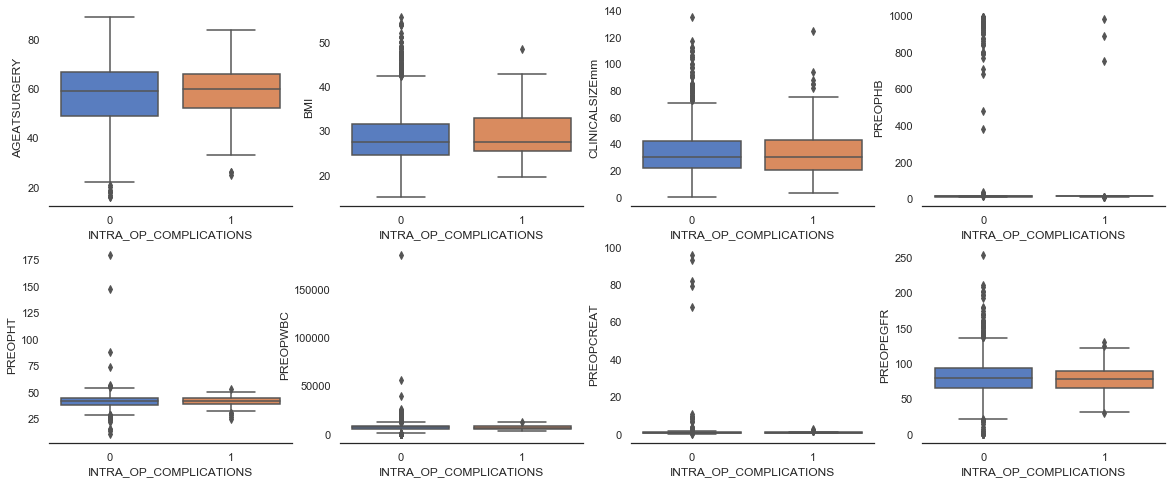

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 4, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])

In [35]:
# Check the number of outliers
outlier_dict = {}
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    outlier_dict.update({i:{'LL':LL,'UL':UL}})
    print('{:<14s} {:>4d} {:>4d}'.format(i,len(df.loc[(df[i]>=UL)]),len(df.loc[(df[i]<=LL)])), 'UL-LL {:>4.2f}-{:>4.2f}'.format(UL,LL))
print(outlier_dict)

BMI              97    0 UL-LL 42.38-13.90
CLINICALSIZEmm   78    0 UL-LL 72.00--8.00
PREOPHB          55    0 UL-LL 18.15-9.75
PREOPHT           8   30 UL-LL 53.80-29.00
PREOPWBC         85   38 UL-LL 12845.00-1525.00
PREOPCREAT      161    2 UL-LL 1.58-0.30
PREOPEGFR        49   27 UL-LL 136.51-22.10
{'BMI': {'LL': 13.899999999999997, 'UL': 42.38}, 'CLINICALSIZEmm': {'LL': -8.0, 'UL': 72.0}, 'PREOPHB': {'LL': 9.75, 'UL': 18.15}, 'PREOPHT': {'LL': 28.999999999999993, 'UL': 53.800000000000004}, 'PREOPWBC': {'LL': 1525.0, 'UL': 12845.0}, 'PREOPCREAT': {'LL': 0.29999999999999993, 'UL': 1.58}, 'PREOPEGFR': {'LL': 22.104999999999983, 'UL': 136.50500000000002}}


In [36]:
#Export the outlier dict
import json
with open(output_path + "outlier_dict.json", "w") as write_file:
    json.dump(outlier_dict, write_file)

In [37]:
#replacing inaccurate readings with missing values
clean_cols = ['BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR']
for i in clean_cols:
    q1 = numeric_stats.loc['25%'][i]
    q3 = numeric_stats.loc['75%'][i]
    IQR = q3-q1
    LL = q1-(1.5*IQR)
    UL = q3+(1.5*IQR)
    df.drop(df.loc[(df[i]<=LL)|(df[i]>=UL),[i]].index, inplace=True)

In [38]:
df.describe()

,AGEATSURGERY,BMI,CLINICALSIZEmm,CHARLSONSCORE,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PREOPEGFR,LOCATIONTOPOLARLINE,NOOFLESIONS,center_volume,INTRA_OP_COMPLICATIONS
count,2829.000000,2505.000000,2713.000000,2357.000000,2136.000000,2005.000000,1707.000000,2792.000000,2169.000000,1645.000000,2327.000000,2836.000000,2846.000000
mean,57.559915,28.086950,31.750571,1.473059,13.915103,41.561546,7210.774423,0.927768,81.125886,1.896049,1.045982,144.878702,0.036543
std,12.584384,5.041671,13.858003,1.967859,1.444019,4.253200,1954.015857,0.209810,18.854179,0.819183,0.245405,120.537720,0.187669
min,16.000000,15.100000,0.000000,0.000000,10.000000,29.000000,1840.000000,0.360000,34.000000,1.000000,0.000000,0.000000,0.000000
25%,49.000000,24.450000,22.000000,0.000000,12.900000,38.800000,5700.000000,0.780000,67.420000,1.000000,1.000000,45.000000,0.000000
50%,59.000000,27.260000,30.000000,1.000000,14.000000,41.900000,7000.000000,0.900000,80.000000,2.000000,1.000000,110.000000,0.000000
75%,67.000000,31.200000,40.000000,2.000000,15.000000,44.700000,8400.000000,1.060000,93.232044,3.000000,1.000000,225.000000,0.000000
max,89.000000,42.300000,71.000000,19.000000,17.800000,53.700000,12840.000000,1.570000,136.493592,3.000000,4.000000,524.000000,1.000000


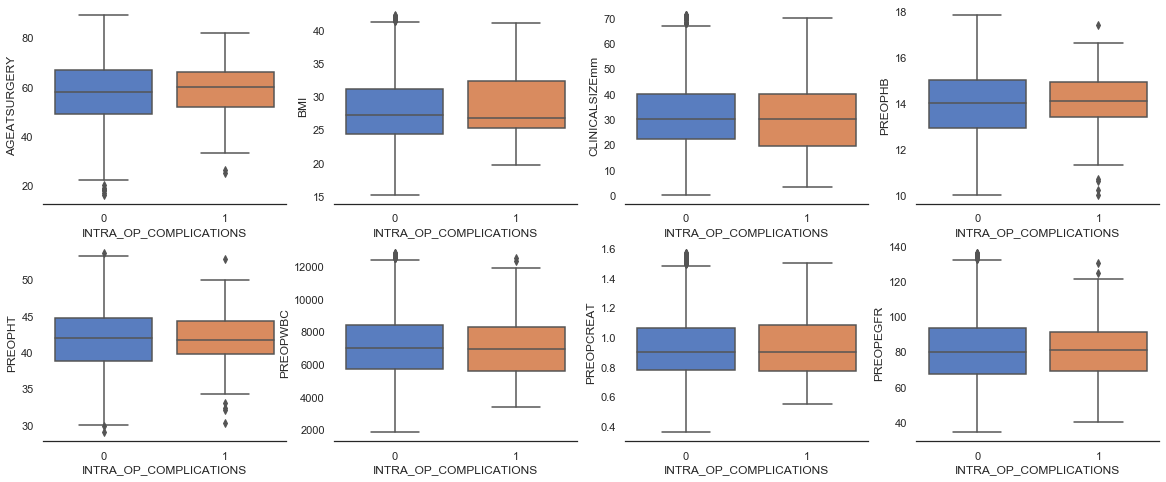

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
f, axes = plt.subplots(2, 4, figsize=(20, 8))
sns.despine(left=True)
sns.boxplot(data = df, y = 'AGEATSURGERY', x = target,ax=axes[0, 0])
sns.boxplot(data = df, y = 'BMI', x = target, ax=axes[0, 1])
sns.boxplot(data = df, y = 'CLINICALSIZEmm', x = target, ax=axes[0, 2])
sns.boxplot(data = df, y = 'PREOPHB', x = target, ax=axes[0, 3])
sns.boxplot(data = df, y = 'PREOPHT', x = target, ax=axes[1, 0])
sns.boxplot(data = df, y = 'PREOPWBC', x = target, ax=axes[1, 1])
sns.boxplot(data = df, y = 'PREOPCREAT', x = target, ax=axes[1, 2])
sns.boxplot(data = df, y = 'PREOPEGFR', x = target, ax=axes[1, 3])

In [40]:
# The percentage of missing data
df.isnull().mean()

PATIENTNUMBER                         0.000000
CENTERCODE                            0.000000
GENDER                                0.003865
AGEATSURGERY                          0.005973
MARITALSTATUS                         0.368587
RACE                                  0.397400
EDUCATION                             0.442727
BMI                                   0.119817
CLINICALSIZEmm                        0.046732
ECOG                                  0.464863
CHARLSONSCORE                         0.171820
SYMPTOMS                              0.233661
SOLITARYKIDNEY                        0.141954
BILATERALITYOFTUMOR                   0.394238
SIDEOFTUMOR                           0.333099
SIDEOFSURGERY                         0.003514
FACE                                  0.248770
TUMORlOCATION                         0.140900
PREOPHB                               0.249473
PREOPHT                               0.295502
PREOPWBC                              0.400211
PREOPCREAT   

In [41]:
# Calculate number missing values per row
df.reset_index(inplace=True, drop=True)
missing = {}

for i in range(len(df)):
    miss_cnt = 0
    for col in df.columns:
        if pd.isna(df[col][i]) == True:
            miss_cnt = miss_cnt+1
    df.loc[i,'Missing'] = miss_cnt

In [42]:
# calculate number of records with over 25% missing data
print("Total Records {}".format(len(df)))
print("Records with >=25% missing data {}".format(sum(df['Missing']<= round((len(df.columns)-2)*.30))))
print("Records to be dropped {}".format(len(df) - sum(df['Missing']<= round((len(df.columns)-2)*.30))))

Total Records 2846
Records with >=25% missing data 1690
Records to be dropped 1156


In [43]:
# Check thenumber of missing values for eahc variables if records with a certain missing threshold were removed
df[df['Missing']<= round((len(df.columns)-2)*.30) ].isnull().mean()

PATIENTNUMBER                         0.000000
CENTERCODE                            0.000000
GENDER                                0.000000
AGEATSURGERY                          0.001183
MARITALSTATUS                         0.086982
RACE                                  0.098225
EDUCATION                             0.123669
BMI                                   0.068639
CLINICALSIZEmm                        0.029586
ECOG                                  0.297041
CHARLSONSCORE                         0.048521
SYMPTOMS                              0.019527
SOLITARYKIDNEY                        0.001183
BILATERALITYOFTUMOR                   0.084024
SIDEOFTUMOR                           0.081065
SIDEOFSURGERY                         0.000592
FACE                                  0.108876
TUMORlOCATION                         0.015385
PREOPHB                               0.021893
PREOPHT                               0.023077
PREOPWBC                              0.107692
PREOPCREAT   

In [44]:
#removing patients with more than 75% missing data
df = df[df['Missing']<= round((len(df.columns)-2)*.30) ].copy()

In [45]:
#Keep columns having less than 10% missing data
df = df[df.columns[df.isnull().mean() <= 0.15]].copy()

print("Total number of columns left after removing columns with missing data: {}".format(len(list(df))))

Total number of columns left after removing columns with missing data: 41


In [46]:
# Print the list of patients with clean data
patient_list = df['PATIENTNUMBER'].tolist()
with open(output_path + 'patient_list.txt', 'w') as f:
    for item in patient_list:
        f.write("%s\n" % item)

In [47]:
# The percentage of missing data
df.isnull().mean()

PATIENTNUMBER                         0.000000
CENTERCODE                            0.000000
GENDER                                0.000000
AGEATSURGERY                          0.001183
MARITALSTATUS                         0.086982
RACE                                  0.098225
EDUCATION                             0.123669
BMI                                   0.068639
CLINICALSIZEmm                        0.029586
CHARLSONSCORE                         0.048521
SYMPTOMS                              0.019527
SOLITARYKIDNEY                        0.001183
BILATERALITYOFTUMOR                   0.084024
SIDEOFTUMOR                           0.081065
SIDEOFSURGERY                         0.000592
FACE                                  0.108876
TUMORlOCATION                         0.015385
PREOPHB                               0.021893
PREOPHT                               0.023077
PREOPWBC                              0.107692
PREOPCREAT                            0.008876
PADUARISK    

In [48]:
# Replcaing missing values in categorical column with NA
for k in cat_col:
    if k in df.columns:
        df[k].fillna('NA',inplace = True)

In [49]:
# Create dictionary mean value for numeric columns
numeric_col_mean_dict = {}
for k in numeric_col_list:
    if k in df.columns:
        numeric_col_mean_dict.update({k:round(df[k].mean())})
print(numeric_col_mean_dict)

{'AGEATSURGERY': 57.0, 'BMI': 28.0, 'CLINICALSIZEmm': 32.0, 'PREOPHB': 14.0, 'PREOPHT': 42.0, 'PREOPWBC': 7128.0, 'PREOPCREAT': 1.0, 'NOOFLESIONS': 1.0, 'CHARLSONSCORE': 1.0}


In [50]:
# export the numeric_col_mean_dict
import json
with open(output_path+ "numeric_col_mean_dict.json", "w") as write_file:
    json.dump(numeric_col_mean_dict, write_file)

In [51]:
# Replacing missing values in numerical columns with their respective mean 
#for k in numeric_col_list:
#    if k in df.columns:
#        df[k].fillna(round(df[k].mean()), inplace = True)

In [52]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 0 to 2845
Data columns (total 41 columns):
PATIENTNUMBER                         1690 non-null object
CENTERCODE                            1690 non-null object
GENDER                                1690 non-null object
AGEATSURGERY                          1688 non-null float64
MARITALSTATUS                         1690 non-null object
RACE                                  1690 non-null object
EDUCATION                             1690 non-null object
BMI                                   1574 non-null float64
CLINICALSIZEmm                        1640 non-null float64
CHARLSONSCORE                         1608 non-null float64
SYMPTOMS                              1690 non-null object
SOLITARYKIDNEY                        1690 non-null object
BILATERALITYOFTUMOR                   1690 non-null object
SIDEOFTUMOR                           1690 non-null object
SIDEOFSURGERY                         1690 non-null object
FACE

In [53]:
# check unique value in each column of type object
unique_count_list = {}

for k in cat_col:
    if k in df.columns:
        unique_count_list.update({k:len(df[k].unique())})

unique_count_list

{'CENTERCODE': 18,
 'GENDER': 2,
 'MARITALSTATUS': 5,
 'RACE': 5,
 'EDUCATION': 5,
 'SYMPTOMS': 4,
 'SOLITARYKIDNEY': 4,
 'BILATERALITYOFTUMOR': 3,
 'SIDEOFTUMOR': 4,
 'SIDEOFSURGERY': 4,
 'FACE': 3,
 'TUMORlOCATION': 6,
 'PADUARISK': 5,
 'POLARLOCATION': 3,
 'RIMLOCATION': 3,
 'RENALSINUS': 3,
 'EXOPHYTICRATE': 4,
 'CLINICALSIZEGROUP': 4,
 'CT': 6,
 'CN': 4,
 'R.E.N.A.L.NEPHRORISKSTRATIFICATION': 5,
 'RADIUSmaximaldiameterincm': 4,
 'NEARNESSOFTUMOUR': 4,
 'ANTERIORORPOSTERIOR': 4,
 'LOCATIONTOPOLARLINE': 4,
 'ASASCORE': 5,
 'PARTIALNEPHROINDICATION': 4,
 'MULTIFOCALITY': 3}

In [54]:
# convert object columns with less than 10 unique values into type category
for col in unique_count_list:
        df[col] = df[col].astype('category').copy()

In [55]:
# list of features with high number of categories
for col in unique_count_list:
    if unique_count_list[col]>10:
        print(col,unique_count_list[col])

CENTERCODE 18


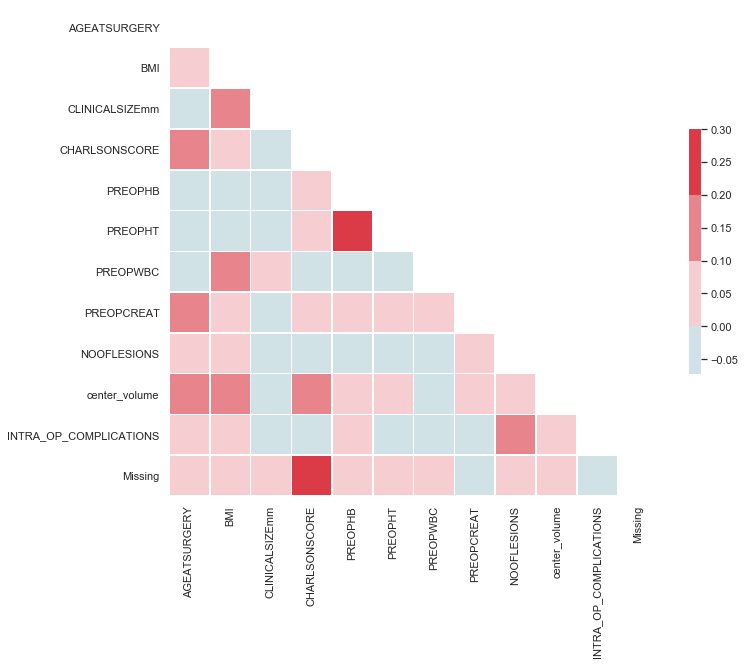

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [57]:
df.reset_index(drop=True, inplace=True)
print("Number records for predicting intra-op complications: {}".format(len(df)))

Number records for predicting intra-op complications: 1690


In [58]:
for i in df.select_dtypes('category').columns:
    df[i] = df[i].apply(str)

In [59]:
# fit label encoder to each column of type category
cat_col =df.select_dtypes('category')
df_codes = df.copy()
from sklearn.preprocessing import LabelEncoder
le_dict = {col: LabelEncoder() for col in cat_col }
for col in cat_col:
    le_dict[col].fit_transform(df_codes[col])

In [60]:
# create a dictionary cantaining mapping of categorical values to numerical values
label_mapping = dict()
label_mapping = {col: dict(zip(le_dict[col].classes_,le_dict[col].transform(le_dict[col].classes_))) for col in cat_col}
label_mapping

{'CENTERCODE': {'08ZMCILJ': 0,
  '0VZRZWAI': 1,
  '39HIP3LQ': 2,
  '3QWOG020': 3,
  '4M49I4D5': 4,
  '4UPDM0XB': 5,
  '57T3OUKU': 6,
  '63DCGHNW': 7,
  '94ISQMHX': 8,
  'FWL0MH42': 9,
  'GCIEYK6L': 10,
  'GQHLD5Q4': 11,
  'QRJWT5QR': 12,
  'RETM03Y8': 13,
  'U5WT3NOY': 14,
  'VNO3BPES': 15,
  'VRVRQ639': 16,
  'WGC7XYXZ': 17},
 'GENDER': {'Female': 0, 'Male': 1},
 'MARITALSTATUS': {'Divorced': 0,
  'Married': 1,
  'NA': 2,
  'Single': 3,
  'Widowed': 4},
 'RACE': {'Black': 0,
  'Mongoloid/Asian': 1,
  'NA': 2,
  'Others': 3,
  'White/Caucasian': 4},
 'EDUCATION': {'Graduate': 0,
  'NA': 1,
  'Not Provided': 2,
  'Post Graduate': 3,
  'Upto High School': 4},
 'SYMPTOMS': {'Absent': 0,
  'Local Symptoms': 1,
  'NA': 2,
  'Systemic Symptoms': 3},
 'SOLITARYKIDNEY': {'NA': 0, 'No': 1, 'Yes': 2, 'no': 3},
 'BILATERALITYOFTUMOR': {'NA': 0, 'No': 1, 'Yes': 2},
 'SIDEOFTUMOR': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},
 'SIDEOFSURGERY': {'Bilateral': 0, 'Left': 1, 'NA': 2, 'Right': 3},


In [61]:
# export the numeric_col_mean_dict
from joblib import dump
dump(le_dict, output_path + 'Label_enc_dict.joblib')

['output/models/Label_enc_dict.joblib']

In [62]:
# mapping categorical column values to integer labels
for col in cat_col:
    df_codes[col] = le_dict[col].transform(df_codes[col]).copy()

In [63]:
df_codes.head()

,PATIENTNUMBER,CENTERCODE,GENDER,AGEATSURGERY,MARITALSTATUS,RACE,EDUCATION,BMI,CLINICALSIZEmm,CHARLSONSCORE,SYMPTOMS,SOLITARYKIDNEY,BILATERALITYOFTUMOR,SIDEOFTUMOR,SIDEOFSURGERY,FACE,TUMORlOCATION,PREOPHB,PREOPHT,PREOPWBC,PREOPCREAT,PADUARISK,POLARLOCATION,RIMLOCATION,RENALSINUS,EXOPHYTICRATE,CLINICALSIZEGROUP,CT,CN,R.E.N.A.L.NEPHRORISKSTRATIFICATION,RADIUSmaximaldiameterincm,NEARNESSOFTUMOUR,ANTERIORORPOSTERIOR,LOCATIONTOPOLARLINE,ASASCORE,PARTIALNEPHROINDICATION,MULTIFOCALITY,NOOFLESIONS,center_volume,INTRA_OP_COMPLICATIONS,Missing
0,13PAT000522,0,1,61.0,1,1,0,25.10,33.0,0.0,0,2,1,1,1,0,0,12.3,39.4,5400.0,1.25,2,2,0,1,0,1,1,1,2,1,0,2,1,2,1,1,1.0,93.0,0,0.0
1,22PAT000131,17,1,58.0,1,1,2,23.18,44.0,0.0,0,1,1,1,1,0,2,14.0,41.0,5100.0,0.90,3,1,0,2,1,0,2,1,3,0,0,0,2,0,1,1,1.0,26.0,0,1.0
2,11PAT000166,1,1,56.0,1,1,2,23.36,NaN,0.0,0,1,1,1,1,0,0,10.2,36.4,5200.0,0.70,1,2,2,1,1,1,1,1,1,1,1,0,0,0,1,1,1.0,105.0,0,2.0
3,15PAT000097,15,0,65.0,1,4,2,26.67,NaN,0.0,0,1,1,1,1,1,4,11.8,36.0,5300.0,1.12,1,2,2,1,0,1,1,1,1,1,2,2,0,1,1,1,1.0,140.0,0,3.0
4,15PAT000095,15,0,23.0,3,4,2,19.65,23.0,0.0,0,1,1,3,3,2,3,13.3,39.2,12100.0,0.70,3,1,0,2,2,1,1,1,3,1,0,3,2,0,1,1,1.0,137.0,0,2.0


### Create Stats fot dataset

In [64]:
# print median , IQR for numeric columns 
for i in df.columns:#['AGEATSURGERY','BMI','CLINICALSIZEmm','PREOPHB','PREOPHT','PREOPWBC','PREOPCREAT','PREOPEGFR','NOOFLESIONS']:
    if i in numeric_col_list + ['center_volume']:
        print(i, "{0:.1f} [{1:.1f}-{2:.1f}]".format(df[i].median(),df[i].quantile(0.25),df[i].quantile(0.75)))

AGEATSURGERY 58.0 [48.0-66.0]
BMI 26.8 [24.1-30.5]
CLINICALSIZEmm 30.0 [22.0-41.0]
CHARLSONSCORE 1.0 [0.0-2.0]
PREOPHB 14.0 [13.0-15.0]
PREOPHT 42.0 [39.0-44.9]
PREOPWBC 6925.0 [5700.0-8300.0]
PREOPCREAT 0.9 [0.8-1.1]
NOOFLESIONS 1.0 [1.0-1.0]
center_volume 123.0 [50.0-259.0]


In [65]:
#Print number of records for each category in categorical columns
for i in df_codes.columns:
    if i in cat_col:
        print(pd.DataFrame(df_codes[i].apply(lambda x: le_dict[i].inverse_transform([x])[0]).value_counts()))

          CENTERCODE
GCIEYK6L         440
63DCGHNW         211
4UPDM0XB         176
4M49I4D5         174
VNO3BPES         115
08ZMCILJ         109
0VZRZWAI          74
FWL0MH42          73
QRJWT5QR          57
U5WT3NOY          54
WGC7XYXZ          43
GQHLD5Q4          35
RETM03Y8          30
57T3OUKU          29
3QWOG020          25
VRVRQ639          24
39HIP3LQ          15
94ISQMHX           6
        GENDER
Male      1109
Female     581
          MARITALSTATUS
Married            1287
Single              157
NA                  147
Divorced             51
Widowed              48
                 RACE
White/Caucasian   864
Others            349
Mongoloid/Asian   265
NA                166
Black              46
                  EDUCATION
Not Provided            703
Graduate                398
Upto High School        220
NA                      209
Post Graduate           160
                   SYMPTOMS
Absent                 1329
Local Symptoms          298
NA                       33


In [66]:
traget_stats = pd.merge(df_codes[['PATIENTNUMBER','INTRA_OP_COMPLICATIONS']],
                        df_ori[['PATIENTNUMBER','INTRAOPCOMPLICATIONS',
                                'INTRAOPCOMPLICATION','INTRAOPTRANSUFUSION',
                                'PADUARISK', 'R.E.N.A.L.NEPHRORISKSTRATIFICATION', 'SURGICALMARGIN']], 
                        left_on='PATIENTNUMBER', 
                        right_on='PATIENTNUMBER').copy()

In [67]:
traget_stats.loc[traget_stats['INTRA_OP_COMPLICATIONS']==1]['INTRAOPCOMPLICATIONS'].value_counts()

179    70
180    14
181     5
182     3
310     2
nan     1
Name: INTRAOPCOMPLICATIONS, dtype: int64

In [68]:
traget_stats.loc[(traget_stats['INTRAOPCOMPLICATIONS']=='179') & (traget_stats['INTRA_OP_COMPLICATIONS']==1),'SURGICALMARGIN'].value_counts(dropna=False)

Negative    67
Positive     2
NaN          1
Name: SURGICALMARGIN, dtype: int64

In [69]:
traget_stats.loc[traget_stats['INTRAOPCOMPLICATIONS']=='310']['PATIENTNUMBER']

98    5PAT000004
99    6PAT000035
Name: PATIENTNUMBER, dtype: object

In [70]:
traget_stats['PATIENTNUMBER'].map(lambda x: 1 if 'PAT' in x else 0).value_counts()

0    968
1    722
Name: PATIENTNUMBER, dtype: int64

In [71]:
traget_stats.loc[traget_stats['INTRA_OP_COMPLICATIONS']==1]['INTRAOPTRANSUFUSION'].value_counts()

No         86
1 Unit      4
>1 Unit     3
Name: INTRAOPTRANSUFUSION, dtype: int64

In [72]:
#print(traget_stats.loc[traget_stats['INTRA_OP_COMPLICATIONS']==0]['PADUARISK'].value_counts())
prob = 0.95
col = 'PADUARISK'
from scipy.stats import chi2_contingency
from scipy.stats import chi2
table = pd.crosstab(traget_stats[col],traget_stats['INTRA_OP_COMPLICATIONS'])
stat, p, dof, expected = chi2_contingency(table.to_numpy())
critical = chi2.ppf(prob, dof)
print(table)
print("{:<35} | stat = {:>6.2f} | critical = {:>6.2f} | dof = {:>2}| p = {:>6.2f}|".format(col,stat,critical,dof,p))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

INTRA_OP_COMPLICATIONS    0   1
PADUARISK                      
0                         1   0
1(Low  Risk)            501  22
2(Intermidiate  Risk)   477  32
3(High  Risk)           390  32
PADUARISK                           | stat =   5.05 | critical =   7.81 | dof =  3| p =   0.17|
Independent (fail to reject H0)


In [73]:
#traget_stats.loc[traget_stats['INTRA_OP_COMPLICATIONS']==1]['R.E.N.A.L.NEPHRORISKSTRATIFICATION'].value_counts()
prob = 0.95
col = 'R.E.N.A.L.NEPHRORISKSTRATIFICATION'
from scipy.stats import chi2_contingency
from scipy.stats import chi2
table = pd.crosstab(traget_stats[col],traget_stats['INTRA_OP_COMPLICATIONS'])
stat, p, dof, expected = chi2_contingency(table.to_numpy())
critical = chi2.ppf(prob, dof)
print(table)
print("{:<35} | stat = {:>6.2f} | critical = {:>6.2f} | dof = {:>2}| p = {:>6.2f}|".format(col,stat,critical,dof,p))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

INTRA_OP_COMPLICATIONS                0   1
R.E.N.A.L.NEPHRORISKSTRATIFICATION         
0                                     3   0
1(Low Risk)                         525  26
2(Intermidiate Risk)                730  48
3(High Risk)                        144  13
R.E.N.A.L.NEPHRORISKSTRATIFICATION  | stat =   3.30 | critical =   7.81 | dof =  3| p =   0.35|
Independent (fail to reject H0)


In [74]:
# Check a point-biserial correlation to check if the relationhsip exists between continuous (predictore) and binary (target)

from scipy import stats
prob = 0.95
selected_num_features = []
for col in df.select_dtypes('float').columns:
    x = df.dropna(axis = 0, subset = [col], how = 'any')
    a = x[col]
    b = x['INTRA_OP_COMPLICATIONS']
    corr, pvalue = stats.pointbiserialr(a,b)
    if pvalue<=0.05:
        selected_num_features.append(col)
    print("{:<20} | corr = {:>6.2f} | p-value = {:.2f} |".format(col, corr, pvalue))

AGEATSURGERY         | corr =   0.02 | p-value = 0.31 |
BMI                  | corr =   0.05 | p-value = 0.05 |
CLINICALSIZEmm       | corr =  -0.01 | p-value = 0.79 |
CHARLSONSCORE        | corr =  -0.03 | p-value = 0.28 |
PREOPHB              | corr =   0.01 | p-value = 0.65 |
PREOPHT              | corr =  -0.01 | p-value = 0.66 |
PREOPWBC             | corr =  -0.01 | p-value = 0.74 |
PREOPCREAT           | corr =  -0.02 | p-value = 0.44 |
NOOFLESIONS          | corr =   0.10 | p-value = 0.00 |
center_volume        | corr =   0.05 | p-value = 0.05 |
Missing              | corr =  -0.07 | p-value = 0.00 |


In [75]:
# Preform Chi2 test to check if the relationhsip exists between categorical (predictor) and binary (target)

from scipy.stats import chi2_contingency
from scipy.stats import chi2
prob = 0.95
slected_col_features = []
for col in cat_col:
    if col in df.columns:
        table = pd.crosstab(df[col],df['INTRA_OP_COMPLICATIONS'])
        stat, p, dof, expected = chi2_contingency(table.to_numpy())
        critical = chi2.ppf(prob, dof)
        if p <=0.5:
            slected_col_features.append(col)
        print("{:<35} | stat = {:>6.2f} | critical = {:>6.2f} | dof = {:>2}| p = {:>6.2f}|".format(col,stat,critical,dof,p))
        

CENTERCODE                          | stat = 120.61 | critical =  27.59 | dof = 17| p =   0.00|
GENDER                              | stat =   3.04 | critical =   3.84 | dof =  1| p =   0.08|
MARITALSTATUS                       | stat =  14.88 | critical =   9.49 | dof =  4| p =   0.00|
RACE                                | stat =  28.71 | critical =   9.49 | dof =  4| p =   0.00|
EDUCATION                           | stat =  44.79 | critical =   9.49 | dof =  4| p =   0.00|
SYMPTOMS                            | stat =   2.34 | critical =   7.81 | dof =  3| p =   0.50|
SOLITARYKIDNEY                      | stat =  13.60 | critical =   7.81 | dof =  3| p =   0.00|
BILATERALITYOFTUMOR                 | stat = 126.34 | critical =   5.99 | dof =  2| p =   0.00|
SIDEOFTUMOR                         | stat = 170.28 | critical =   7.81 | dof =  3| p =   0.00|
SIDEOFSURGERY                       | stat =   0.29 | critical =   7.81 | dof =  3| p =   0.96|
FACE                                | st

### Create Train and Test dataset 

In [76]:
df_codes.corr()['INTRA_OP_COMPLICATIONS']

CENTERCODE                            0.089367
GENDER                               -0.045110
AGEATSURGERY                          0.024714
MARITALSTATUS                        -0.039085
RACE                                  0.123084
EDUCATION                             0.039851
BMI                                   0.048492
CLINICALSIZEmm                       -0.006625
CHARLSONSCORE                        -0.026939
SYMPTOMS                             -0.024250
SOLITARYKIDNEY                       -0.083211
BILATERALITYOFTUMOR                   0.206581
SIDEOFTUMOR                          -0.110623
SIDEOFSURGERY                         0.010472
FACE                                  0.019241
TUMORlOCATION                         0.006732
PREOPHB                               0.011302
PREOPHT                              -0.010967
PREOPWBC                             -0.008607
PREOPCREAT                           -0.019035
PADUARISK                             0.018298
POLARLOCATION

In [77]:
print('Number of patients {}'.format(len(df_codes)))
print('% of patients with complications {:.2f}%'.format(sum(df_codes['INTRA_OP_COMPLICATIONS'])/len(df_codes)*100))

Number of patients 1690
% of patients with complications 5.62%


In [78]:
# Split data in test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_codes, test_size=0.30, random_state=42, stratify = df_codes['INTRA_OP_COMPLICATIONS'])

In [79]:
# Percentage of complications in trainset
train['INTRA_OP_COMPLICATIONS'].sum()/len(train)

0.0566356720202874

In [80]:
# Percentage of complications in testset
test['INTRA_OP_COMPLICATIONS'].sum()/len(test)

0.055226824457593686

In [81]:
# change the dtype of numeric columns to float 32
for i in df_codes.select_dtypes('float').columns:
    df_codes[i] = df_codes[i].astype('float32')

In [82]:
output_path = 'H:\RediMinds\VCQI'
df_codes.drop(labels=['Missing'], axis='columns', inplace=True)
df_codes.to_csv(output_path+"\VCQI_clean.csv",index=False)
traget_stats.to_csv(output_path+"\Target_stats.csv",index=False)

In [83]:
patient_list_train = train['PATIENTNUMBER'].tolist()
patient_list_test = test['PATIENTNUMBER'].tolist()
from joblib import dump
dump(patient_list_train, 'output/models/patient_list_train.joblib')
dump(patient_list_test, 'output/models/patient_list_test.joblib')

['output/models/patient_list_test.joblib']

In [84]:
# Save train and test dataset
train.drop(labels=['Missing'], axis='columns', inplace=True)
test.drop(labels=['Missing'], axis='columns', inplace=True)
train.to_csv(output_path+"\VCQI_clean_train.csv",index=False)
test.to_csv(output_path+"\VCQI_clean_test.csv",index=False)

C:\Users\anubhav\Anaconda3\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [85]:
import pickle

cat_col = df.select_dtypes('category')

with open(output_path+'\cat_col', 'wb') as fp:
    pickle.dump(cat_col.columns.to_list(), fp)

### Generate Evaluvation Metrics for PADUA Score and RENAL Score 

In [86]:
x = test.loc[test['PADUARISK']!=4][['PADUARISK','INTRA_OP_COMPLICATIONS']].copy()
x['Pred'] = x['PADUARISK'].apply(lambda y: 1 if y==3 else 0)
from sklearn import metrics
print(metrics.classification_report(x['INTRA_OP_COMPLICATIONS'], x['Pred']))
print(metrics.confusion_matrix(x['INTRA_OP_COMPLICATIONS'], x['Pred']))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       403
           1       0.06      0.28      0.09        25

    accuracy                           0.68       428
   macro avg       0.50      0.49      0.45       428
weighted avg       0.89      0.68      0.77       428

[[285 118]
 [ 18   7]]


In [87]:
x = test.loc[test['R.E.N.A.L.NEPHRORISKSTRATIFICATION']!=4][['R.E.N.A.L.NEPHRORISKSTRATIFICATION','INTRA_OP_COMPLICATIONS']].copy()
x['Pred'] = x['R.E.N.A.L.NEPHRORISKSTRATIFICATION'].apply(lambda y: 1 if y==3 else 0)
from sklearn import metrics
print(metrics.classification_report(x['INTRA_OP_COMPLICATIONS'], x['Pred']))
print(metrics.confusion_matrix(x['INTRA_OP_COMPLICATIONS'], x['Pred']))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       410
           1       0.04      0.08      0.05        26

    accuracy                           0.84       436
   macro avg       0.49      0.48      0.48       436
weighted avg       0.88      0.84      0.86       436

[[365  45]
 [ 24   2]]
